Linear Regression Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data Analysis

In [3]:
# Load the data
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('data.csv')
df.head()

,sourceid,destid,distance,duration,duration_in_traffic
0,2,3,4768,814,1182
1,2,4,4994,789,1213
2,2,51,21782,2598,4726
3,2,53,29096,3478,6454
4,2,54,25672,3124,5809


In [4]:
print(df.dtypes)
print("The dimension of dataset is",df.shape)

sourceid               int64
destid                 int64
distance               int64
duration               int64
duration_in_traffic    int64
dtype: object
The dimension of dataset is (38996, 5)


Data Preprocessing

In [5]:
# one-hot encoding categorical variables
df = pd.get_dummies(df, columns=['sourceid', 'destid']) 
df.head()

,distance,duration,duration_in_traffic,sourceid_1,sourceid_2,sourceid_3,sourceid_4,sourceid_5,sourceid_6,sourceid_7,sourceid_8,sourceid_9,sourceid_10,sourceid_11,sourceid_12,sourceid_13,sourceid_14,sourceid_15,sourceid_16,sourceid_17,sourceid_18,sourceid_19,sourceid_20,sourceid_21,sourceid_22,sourceid_23,sourceid_24,sourceid_25,sourceid_26,sourceid_27,sourceid_28,sourceid_29,sourceid_30,sourceid_31,sourceid_32,sourceid_33,sourceid_34,sourceid_35,sourceid_36,sourceid_37,sourceid_38,sourceid_39,sourceid_40,sourceid_41,sourceid_42,sourceid_43,sourceid_44,sourceid_45,sourceid_46,sourceid_47,sourceid_48,sourceid_49,sourceid_50,sourceid_51,sourceid_52,sourceid_53,sourceid_54,sourceid_55,sourceid_56,sourceid_57,sourceid_58,sourceid_59,sourceid_60,sourceid_61,sourceid_62,sourceid_63,sourceid_64,sourceid_65,sourceid_66,sourceid_67,sourceid_68,sourceid_69,sourceid_70,sourceid_71,sourceid_72,sourceid_73,sourceid_74,sourceid_75,sourceid_76,sourceid_77,sourceid_78,sourceid_79,sourceid_80,sourceid_81,sourceid_82,sourceid_83,sourceid_84,sourceid_85,sourceid_86,sourceid_87,sourceid_88,sourceid_89,sourceid_90,sourceid_91,sourceid_92,sourceid_93,sourceid_94,sourceid_95,sourceid_96,sourceid_97,sourceid_98,sourceid_99,sourceid_100,sourceid_101,sourceid_102,sourceid_103,sourceid_104,sourceid_105,sourceid_106,sourceid_107,sourceid_108,sourceid_109,sourceid_110,sourceid_111,sourceid_112,sourceid_113,sourceid_114,sourceid_115,sourceid_116,sourceid_117,sourceid_118,sourceid_119,sourceid_120,sourceid_121,sourceid_122,sourceid_123,sourceid_124,sourceid_125,sourceid_126,sourceid_127,sourceid_128,sourceid_129,sourceid_130,sourceid_131,sourceid_132,sourceid_133,sourceid_134,sourceid_135,sourceid_136,sourceid_137,sourceid_138,sourceid_139,sourceid_140,sourceid_141,sourceid_142,sourceid_143,sourceid_144,sourceid_145,sourceid_146,sourceid_147,sourceid_148,sourceid_149,sourceid_150,sourceid_151,sourceid_152,sourceid_153,sourceid_154,sourceid_155,sourceid_156,sourceid_157,sourceid_158,sourceid_159,sourceid_160,sourceid_161,sourceid_162,sourceid_163,sourceid_164,sourceid_165,sourceid_166,sourceid_167,sourceid_168,sourceid_169,sourceid_170,sourceid_171,sourceid_172,sourceid_173,sourceid_174,sourceid_175,sourceid_176,sourceid_177,sourceid_178,sourceid_179,sourceid_180,sourceid_181,sourceid_182,sourceid_183,sourceid_184,sourceid_185,sourceid_186,sourceid_187,sourceid_188,sourceid_189,sourceid_190,sourceid_191,sourceid_192,sourceid_193,sourceid_194,sourceid_195,sourceid_196,sourceid_197,sourceid_198,destid_1,destid_2,destid_3,destid_4,destid_5,destid_6,destid_7,destid_8,destid_9,destid_10,destid_11,destid_12,destid_13,destid_14,destid_15,destid_16,destid_17,destid_18,destid_19,destid_20,destid_21,destid_22,destid_23,destid_24,destid_25,destid_26,destid_27,destid_28,destid_29,destid_30,destid_31,destid_32,destid_33,destid_34,destid_35,destid_36,destid_37,destid_38,destid_39,destid_40,destid_41,destid_42,destid_43,destid_44,destid_45,destid_46,destid_47,destid_48,destid_49,destid_50,destid_51,destid_52,destid_53,destid_54,destid_55,destid_56,destid_57,destid_58,destid_59,destid_60,destid_61,destid_62,destid_63,destid_64,destid_65,destid_66,destid_67,destid_68,destid_69,destid_70,destid_71,destid_72,destid_73,destid_74,destid_75,destid_76,destid_77,destid_78,destid_79,destid_80,destid_81,destid_82,destid_83,destid_84,destid_85,destid_86,destid_87,destid_88,destid_89,destid_90,destid_91,destid_92,destid_93,destid_94,destid_95,destid_96,destid_97,destid_98,destid_99,destid_100,destid_101,destid_102,destid_103,destid_104,destid_105,destid_106,destid_107,destid_108,destid_109,destid_110,destid_111,destid_112,destid_113,destid_114,destid_115,destid_116,destid_117,destid_118,destid_119,destid_120,destid_121,destid_122,destid_123,destid_124,destid_125,destid_126,destid_127,destid_128,destid_129,destid_130,destid_131,destid_132,destid_133,destid_134,destid_135,destid_136,destid_137,destid_138,destid_139,destid_140,destid_141,destid_142,destid_143,destid_144,destid_145,destid_1

In [6]:
##  1. Step make the list of features which has missing values.

feature_with_na = [features for features in df.columns if df[features].isnull().any()]
## step print the feature name and the percentage of missing values
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing values') 
if len(feature_with_na)==0:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


In [7]:
# Split the data into features (X) and targets (y)
X = df.drop(['duration', 'duration_in_traffic'], axis=1)
y = df[['duration', 'duration_in_traffic']]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

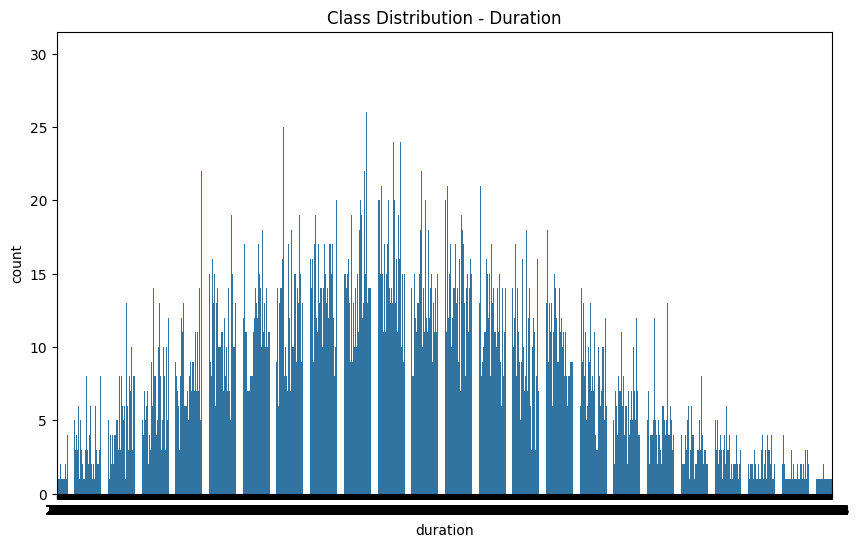

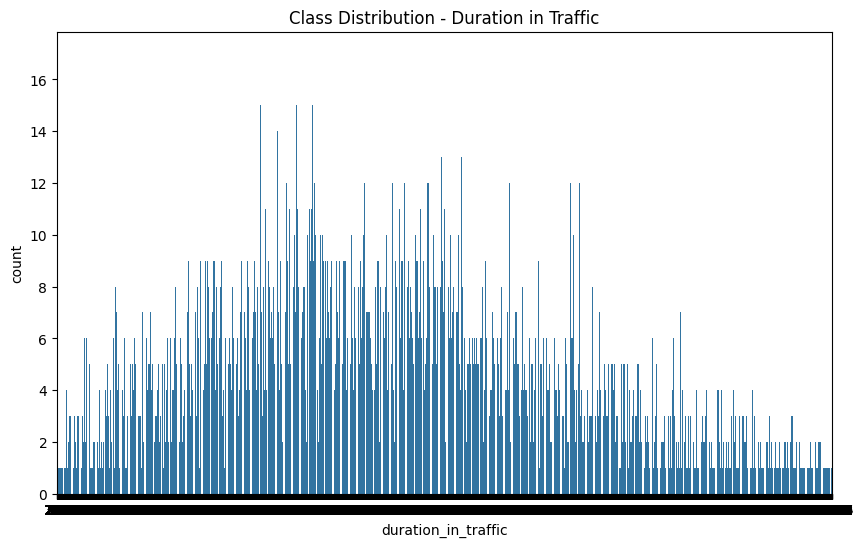

In [8]:
'''# Check the distribution of the 'duration' class
print(df['duration'].value_counts())

# Check the distribution of the 'duration_in_traffic' class
print(df['duration_in_traffic'].value_counts())
'''
plt.figure(figsize=(10, 6))
sns.countplot(x='duration', data=df)
plt.title('Class Distribution - Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='duration_in_traffic', data=df)
plt.title('Class Distribution - Duration in Traffic')
plt.show()

# Model Building and Comparison


### Linear Regression model

In [24]:
# Create and fit the model
modelL = LinearRegression()
modelL.fit(X_train, y_train)
# Make predictions on the test set
y_pred = modelL.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.8073621236960234
Root Mean Squared Error: 742.6047988211708
Mean Absolute Error: 495.2798696260385


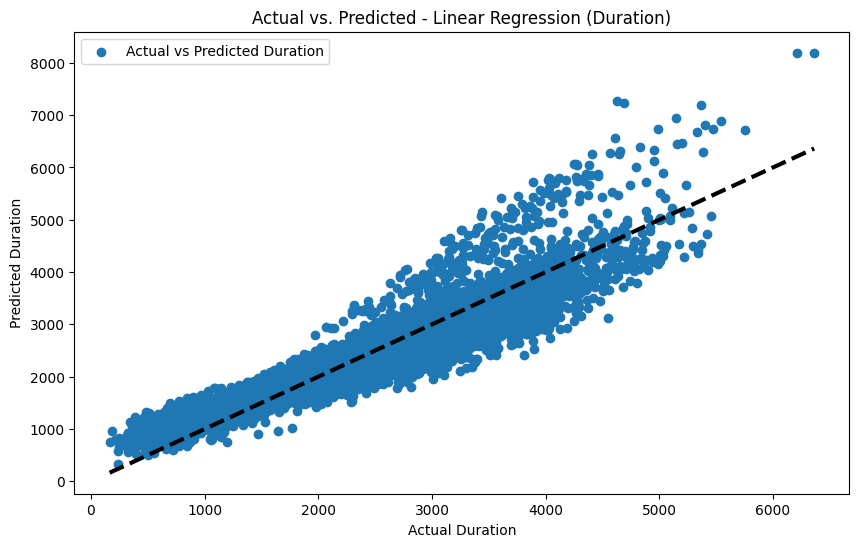

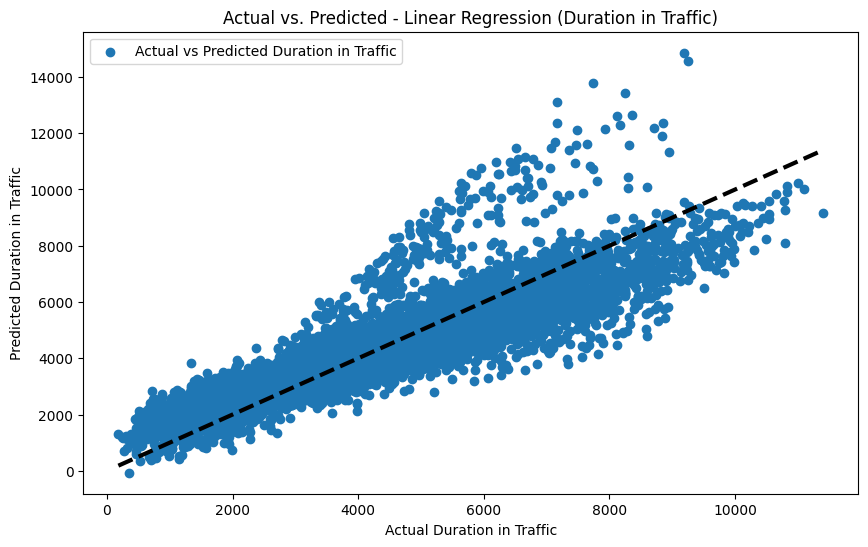

In [35]:
# Plot for 'duration'
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration'], y_pred[:, 0], label='Actual vs Predicted Duration')
plt.plot([y_test['duration'].min(), y_test['duration'].max()], [y_test['duration'].min(), y_test['duration'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted - Linear Regression (Duration)')
plt.legend()
plt.show()

# Plot for 'duration_in_traffic'
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration_in_traffic'], y_pred[:, 1], label='Actual vs Predicted Duration in Traffic')
plt.plot([y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], [y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration in Traffic')
plt.ylabel('Predicted Duration in Traffic')
plt.title('Actual vs. Predicted - Linear Regression (Duration in Traffic)')
plt.legend()
plt.show()

Hyperparameter tuning for linear regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Added 'positive' parameter instead of 'normalize'
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='r2')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

# Evaluate the performance of the best model
r2_grid = r2_score(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
mae_grid = mean_absolute_error(y_test, y_pred_grid)

print("Performance Metrics for Best Model:")
print(f'R-squared: {r2_grid}')
print(f'Root Mean Squared Error: {rmse_grid}')
print(f'Mean Absolute Error: {mae_grid}')

Best Hyperparameters: {'fit_intercept': True, 'positive': True}
Performance Metrics for Best Model:
R-squared: 0.8073419976795881
Root Mean Squared Error: 742.6600417011192
Mean Absolute Error: 495.30362004206734


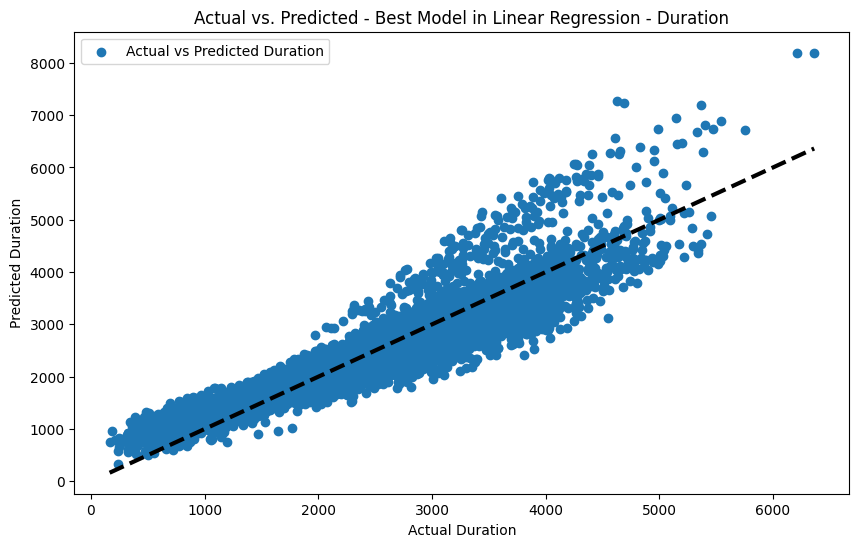

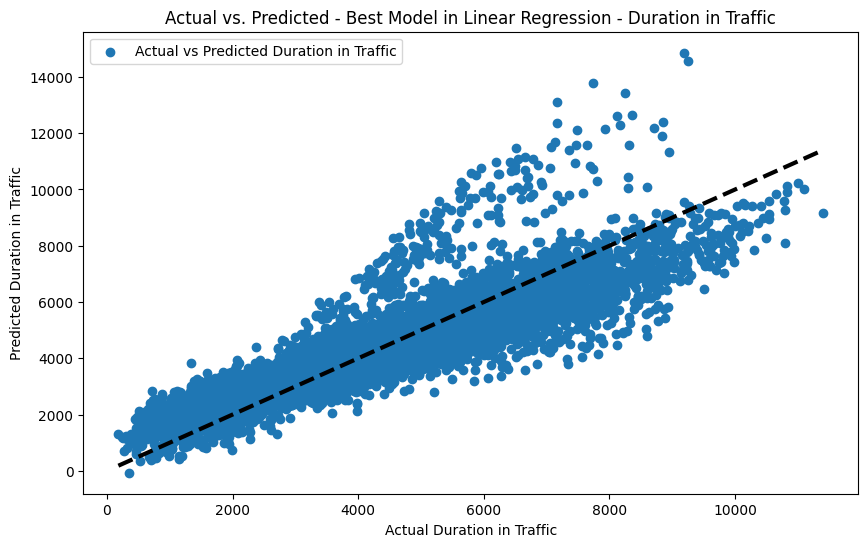

In [37]:
import matplotlib.pyplot as plt

# Plot for Best Model selected by GridSearchCV - Duration
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration'], y_pred_grid[:, 0], label='Actual vs Predicted Duration')
plt.plot([y_test['duration'].min(), y_test['duration'].max()], [y_test['duration'].min(), y_test['duration'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted - Best Model in Linear Regression - Duration')
plt.legend()
plt.show()

# Plot for Best Model selected by GridSearchCV - Duration in Traffic
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration_in_traffic'], y_pred_grid[:, 1], label='Actual vs Predicted Duration in Traffic')
plt.plot([y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], [y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration in Traffic')
plt.ylabel('Predicted Duration in Traffic')
plt.title('Actual vs. Predicted - Best Model in Linear Regression - Duration in Traffic')
plt.legend()
plt.show()

Actual vs. Predicted Plot:
    Plot the actual values against the predicted values to visually assess how well the model is performing.

### RandomForest Regressor
    better to handle outliers

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Create and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Performance Metrics for Random Forest Regression:")
print(f'R-squared: {r2_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Performance Metrics for Random Forest Regression:
R-squared: 0.898826293791837
Root Mean Squared Error: 541.6157242425145
Mean Absolute Error: 338.1995294871789


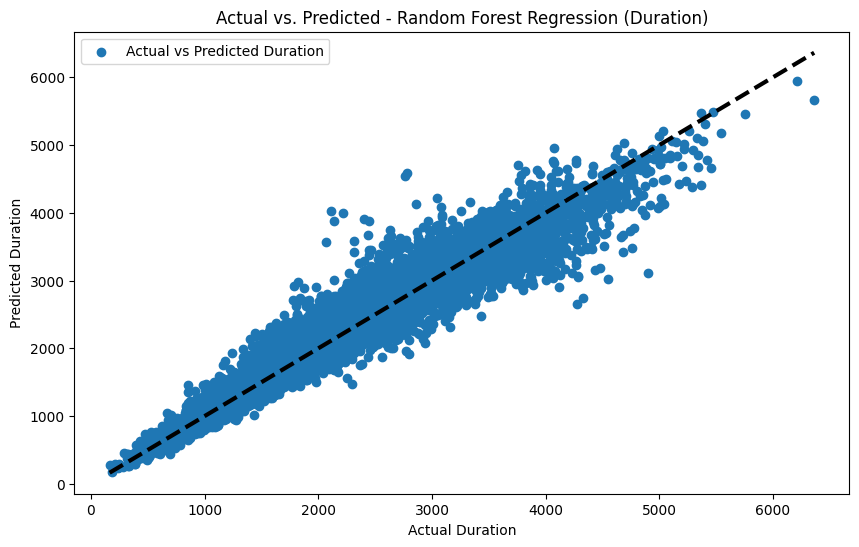

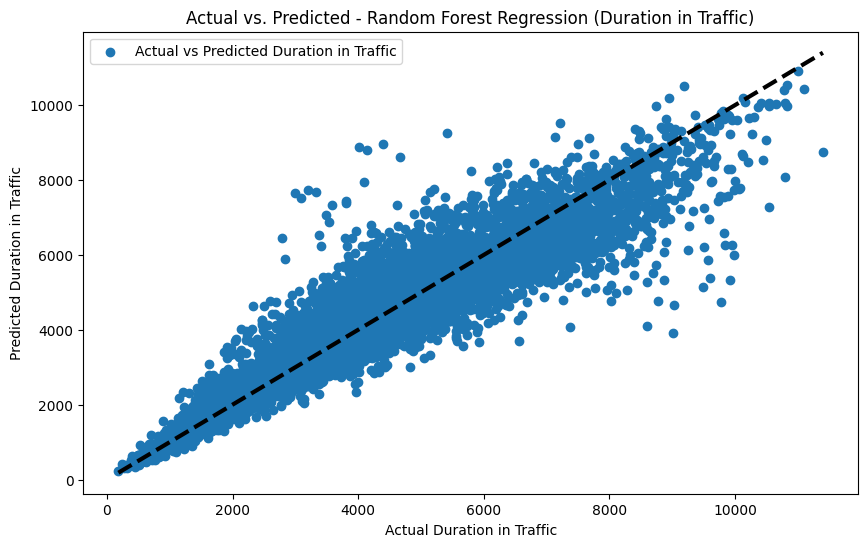

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration'], y_pred_rf[:, 0], label='Actual vs Predicted Duration')
plt.plot([y_test['duration'].min(), y_test['duration'].max()], [y_test['duration'].min(), y_test['duration'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted - Random Forest Regression (Duration)')
plt.legend()
plt.show()

# Plot for Random Forest Regression - Duration in Traffic
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration_in_traffic'], y_pred_rf[:, 1], label='Actual vs Predicted Duration in Traffic')
plt.plot([y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], [y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration in Traffic')
plt.ylabel('Predicted Duration in Traffic')
plt.title('Actual vs. Predicted - Random Forest Regression (Duration in Traffic)')
plt.legend()
plt.show()

### Support Vector Regression

In [20]:
from sklearn.svm import SVR
# Create and fit the SVR model for 'duration'
svr_model_duration = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used
svr_model_duration.fit(X_train, y_train['duration'])

# Make predictions on the test set for 'duration'
y_pred_svr_duration = svr_model_duration.predict(X_test)

# Evaluate the model for 'duration'
r2_svr_duration = r2_score(y_test['duration'], y_pred_svr_duration)
rmse_svr_duration = np.sqrt(mean_squared_error(y_test['duration'], y_pred_svr_duration))
mae_svr_duration = mean_absolute_error(y_test['duration'], y_pred_svr_duration)

print("Performance Metrics for Support Vector Regression (SVR) - Duration:")
print(f'R-squared: {r2_svr_duration}')
print(f'Root Mean Squared Error: {rmse_svr_duration}')
print(f'Mean Absolute Error: {mae_svr_duration}\n')

# Create and fit the SVR model for 'duration_in_traffic'
svr_model_duration_traffic = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used
svr_model_duration_traffic.fit(X_train, y_train['duration_in_traffic'])

# Make predictions on the test set for 'duration_in_traffic'
y_pred_svr_duration_traffic = svr_model_duration_traffic.predict(X_test)

# Evaluate the model for 'duration_in_traffic'
r2_svr_duration_traffic = r2_score(y_test['duration_in_traffic'], y_pred_svr_duration_traffic)
rmse_svr_duration_traffic = np.sqrt(mean_squared_error(y_test['duration_in_traffic'], y_pred_svr_duration_traffic))
mae_svr_duration_traffic = mean_absolute_error(y_test['duration_in_traffic'], y_pred_svr_duration_traffic)

print("Performance Metrics for Support Vector Regression (SVR) - Duration in Traffic:")
print(f'R-squared: {r2_svr_duration_traffic}')
print(f'Root Mean Squared Error: {rmse_svr_duration_traffic}')
print(f'Mean Absolute Error: {mae_svr_duration_traffic}')

Performance Metrics for Support Vector Regression (SVR) - Duration:
R-squared: 0.8505662414749409
Root Mean Squared Error: 380.705741730343
Mean Absolute Error: 272.226083183266
Performance Metrics for Support Vector Regression (SVR) - Duration in Traffic:
R-squared: 0.7596123829529329
Root Mean Squared Error: 991.1074665666766
Mean Absolute Error: 715.5256484132568


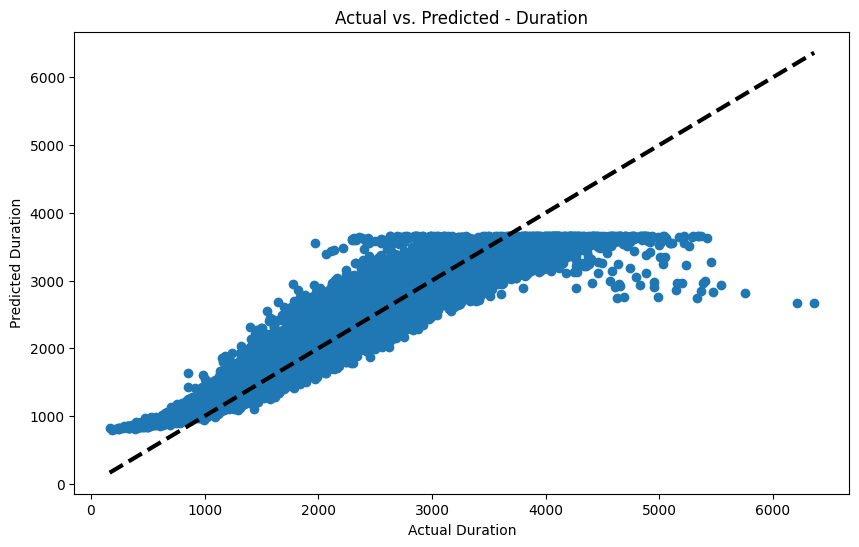

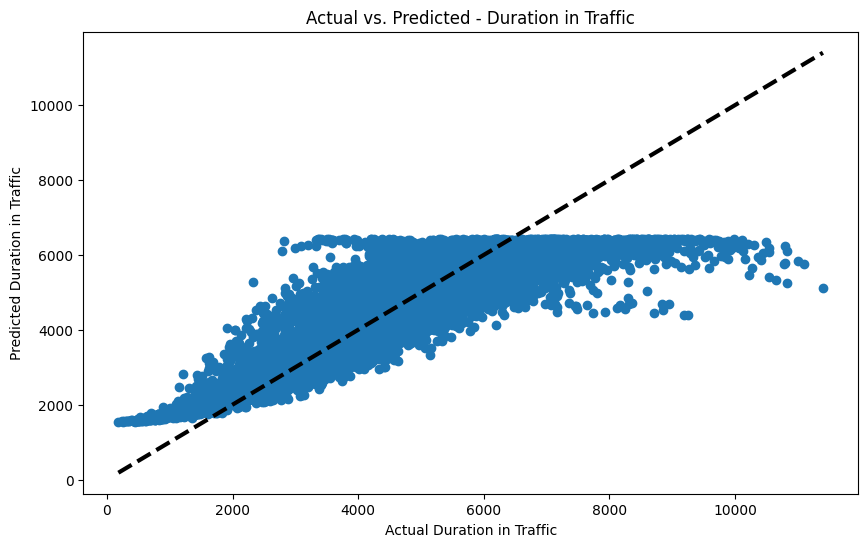

In [29]:
# Plot for 'duration'
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration'], y_pred_svr_duration)
plt.plot([y_test['duration'].min(), y_test['duration'].max()], [y_test['duration'].min(), y_test['duration'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted - Duration')
plt.show()

# Plot for 'duration_in_traffic'
plt.figure(figsize=(10, 6))
plt.scatter(y_test['duration_in_traffic'], y_pred_svr_duration_traffic)
plt.plot([y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], [y_test['duration_in_traffic'].min(), y_test['duration_in_traffic'].max()], 'k--', lw=3)
plt.xlabel('Actual Duration in Traffic')
plt.ylabel('Predicted Duration in Traffic')
plt.title('Actual vs. Predicted - Duration in Traffic')
plt.show()

Residual Plot:
    Creating a residual plot helps to visualize the differences between predicted and actual values. 

In [31]:
'''residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred[:, 0], y=residuals.iloc[:, 0])
plt.title('Residual Plot - Duration')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred[:, 1], y=residuals.iloc[:, 1])
plt.title('Residual Plot - Duration in Traffic')
plt.xlabel('Predicted Duration in Traffic')
plt.ylabel('Residuals')
plt.show()'''

"residuals = y_test - y_pred\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=y_pred[:, 0], y=residuals.iloc[:, 0])\nplt.title('Residual Plot - Duration')\nplt.xlabel('Predicted Duration')\nplt.ylabel('Residuals')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=y_pred[:, 1], y=residuals.iloc[:, 1])\nplt.title('Residual Plot - Duration in Traffic')\nplt.xlabel('Predicted Duration in Traffic')\nplt.ylabel('Residuals')\nplt.show()"

Testing Model

In [127]:
# Function to take user input and return predictions
def predict_travel_timesL(sourceid, destid):
    # Create a new DataFrame with the same structure as X
    X_new = pd.DataFrame(columns=X.columns)
    
    # Add the sourceid and destid to the new DataFrame
    X_new.loc[0, f'sourceid_{sourceid}'] = 1
    X_new.loc[0, f'destid_{destid}'] = 1
    
    # Fill any NaN values with 0
    X_new = X_new.fillna(0)
 
    
    # Make predictions
    y_pred = modelL.predict(X_new)
    
    # Return the predictions
    return y_pred[0]


In [130]:
# Test the function
sourceid = int(input("Enter SourceID: "))
destid = int(input("Enter DestinationID: "))
predictions = predict_travel_timesL(sourceid, destid)
print(f'Predicted travel time in normal hours: {predictions[0]}')
print(f'Predicted travel time in peak traffic hours: {predictions[1]}')

Predicted travel time in normal hours: 675.302927402053
Predicted travel time in peak traffic hours: 853.9427548914749
